# EAGE 2020 abstract, Figure 2

Motivation for space-frequency vs. space-Laplace domain calculations.

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Style adjustments
%matplotlib notebook

In [3]:
src = [0, 0, 500]
rec = [1000, 1000, 600]
depth = [0]
res = [2e24, 1]
solution = 'dhs'

# Frequencies
freqs = np.logspace(-4.5, 3, 301)

# Frequency domain s = 2j*pi*freq
fresp = empymod.analytical(src=src, rec=rec, res=res[1], freqtime=freqs, solution=solution)

# Laplace domain s = freq
lresp = empymod.analytical(src=src, rec=rec, res=res[1], freqtime=-freqs, solution=solution)


:: empymod END; runtime = 0:00:00.004967 :: 


:: empymod END; runtime = 0:00:00.002244 :: 



<IPython.core.display.Javascript object>


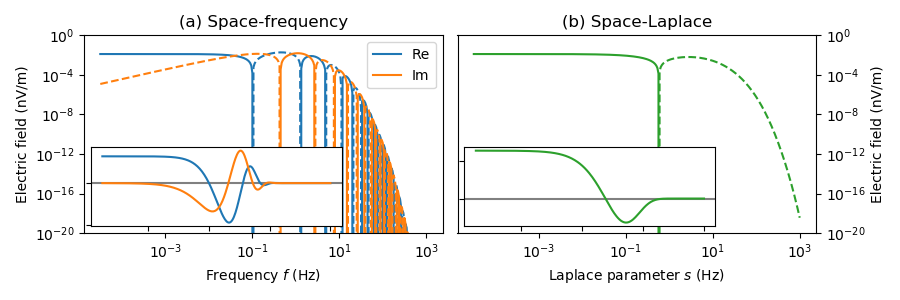

/home/dtr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [4]:
plt.figure(figsize=(9, 3))

# Frequency domain
ax1 = plt.subplot(121)
ax1.set_title('(a) Space-frequency')
ax1.set_xlabel('Frequency $f$ (Hz)')
ax1.set_ylabel('Electric field (nV/m)')

ax1.plot(freqs, fresp.real*1e9, 'C0-', label='Re')
ax1.plot(freqs, -fresp.real*1e9, 'C0--')
ax1.plot(freqs, fresp.imag*1e9, 'C1-', label='Im')
ax1.plot(freqs, -fresp.imag*1e9, 'C1--')
plt.legend(loc=1)

ax1.set_xscale('log')
ax1.set_yscale('log')

# lin-lin inset
ax3 = inset_axes(ax1, width="70%", height="40%", loc=3)
ax3.axhline(0, color='.5')
ax3.plot(freqs, fresp.real*1e9, 'C0-')
ax3.plot(freqs, fresp.imag*1e9, 'C1-')
ax3.set_xscale('log')
ax3.set_yticklabels([])
ax3.set_xticklabels([])


# Laplace domain
ax2 = plt.subplot(122, sharey=ax1)
ax2.set_title('(b) Space-Laplace')
ax2.set_xlabel('Laplace parameter $s$ (Hz)')
ax2.set_ylabel('Electric field (nV/m)')

ax2.plot(freqs, lresp*1e9, 'C2-', label='s-domain')
ax2.plot(freqs, -lresp*1e9, 'C2--', label='s-domain')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1e-20, 1e0])

# lin-lin inset
ax4 = inset_axes(ax2, width="70%", height="40%", loc=3)
ax4.axhline(0, color='.5')
ax4.plot(freqs, lresp*1e9, 'C2-')
ax4.set_xscale('log')
ax4.set_yticklabels([])
ax4.set_xticklabels([])

plt.tight_layout()
# plt.savefig('../figures/motivationcomparison.pdf', bbox_inches='tight')
plt.show()

In [5]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Mon Jan 06 13:31:48 2020 CET

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

            1.17.4 : numpy
             1.3.2 : scipy
            1.10.2 : empymod
             2.7.0 : numexpr
            7.10.2 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------